In [64]:
import pandas as pd
import numpy as np

In [65]:
df_airlines = pd.read_csv("airlines.csv")
df_airports = pd.read_csv("airports.csv")
df_flights = pd.read_csv("flights_train.csv")
df_flights_test = pd.read_csv("flights_test.csv")
df_airports = df_airports.dropna()

In [66]:
df_flights = df_flights[df_flights['MONTH'] == 1]
df_flights['DATE'] = pd.to_datetime(df_flights[['YEAR','MONTH','DAY']])
df_flights.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01


In [67]:
df_flights.dtypes

id                              int64
YEAR                            int64
MONTH                           int64
DAY                             int64
DAY_OF_WEEK                     int64
AIRLINE                        object
FLIGHT_NUMBER                   int64
TAIL_NUMBER                    object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE             int64
DEPARTURE_TIME                float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
DISTANCE                        int64
SCHEDULED_ARRIVAL               int64
ARRIVAL_DELAY                 float64
DATE                   datetime64[ns]
dtype: object

In [68]:
df_flights['FLIGHT_STATUS'] = np.where(df_flights['ARRIVAL_DELAY'] > 0, 1, 0)
    

In [69]:
df_flights.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE,FLIGHT_STATUS
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,1
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,0


In [70]:
# delay = df_flights['DEPARTURE_TIME'] - df_flights['SCHEDULED_DEPARTURE']
# if(delay > 2300):
#     delay = 2400 - delay
    
# #else:
#     #delay = df_flights['DEPARTURE_TIME'] - df_flights['SCHEDULED_DEPARTURE']    
# #df_flights["DEPARTURE_DELAY"] = df_flights['DEPARTURE_TIME'] - df_flights['SCHEDULED_DEPARTURE']
# df_flights["DEPARTURE_DELAY"] = delay
# df_flights.head(5)

In [71]:
df_flights_test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912


In [72]:
df_flights_test.shape

(514384, 17)

In [73]:
df_flights.shape

(457013, 20)

In [74]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

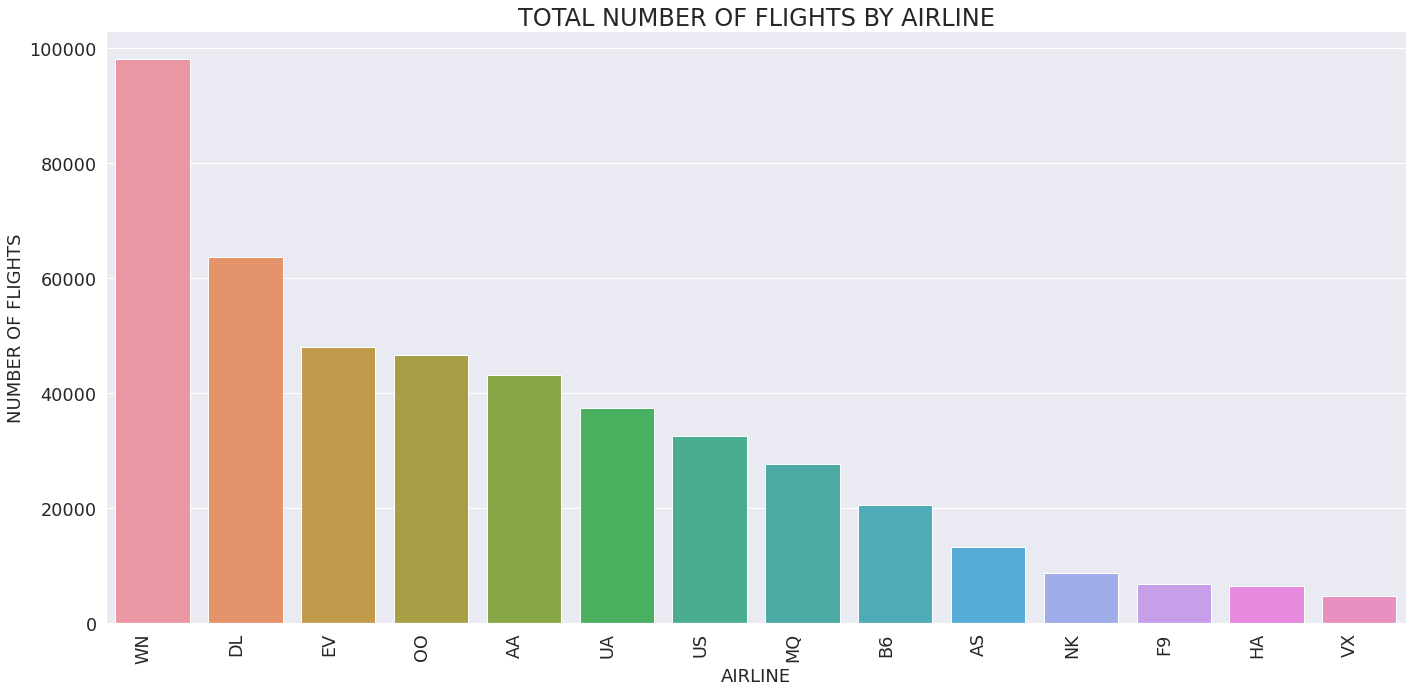

In [75]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df_flights['AIRLINE'], data=df_flights, order=df_flights['AIRLINE'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [76]:
df_flights.AIRLINE.value_counts()

WN    98060
DL    63676
EV    48084
OO    46655
AA    43074
UA    37363
US    32478
MQ    27568
B6    20482
AS    13151
NK     8632
F9     6735
HA     6408
VX     4647
Name: AIRLINE, dtype: int64

Now the question to ask ourselves would be: if the top 5 airlines in terms of number of flight, are also the best in terms of arriving on time? Let's see which are the airlines with the most delayed flight to try to answer this:

Number of Delayed Flights by Airline
In order to calculate the number of delayed flights, I will use the engineered column FLIGHT_STATUS by adding all it's values per airline and sorting them in descending order:

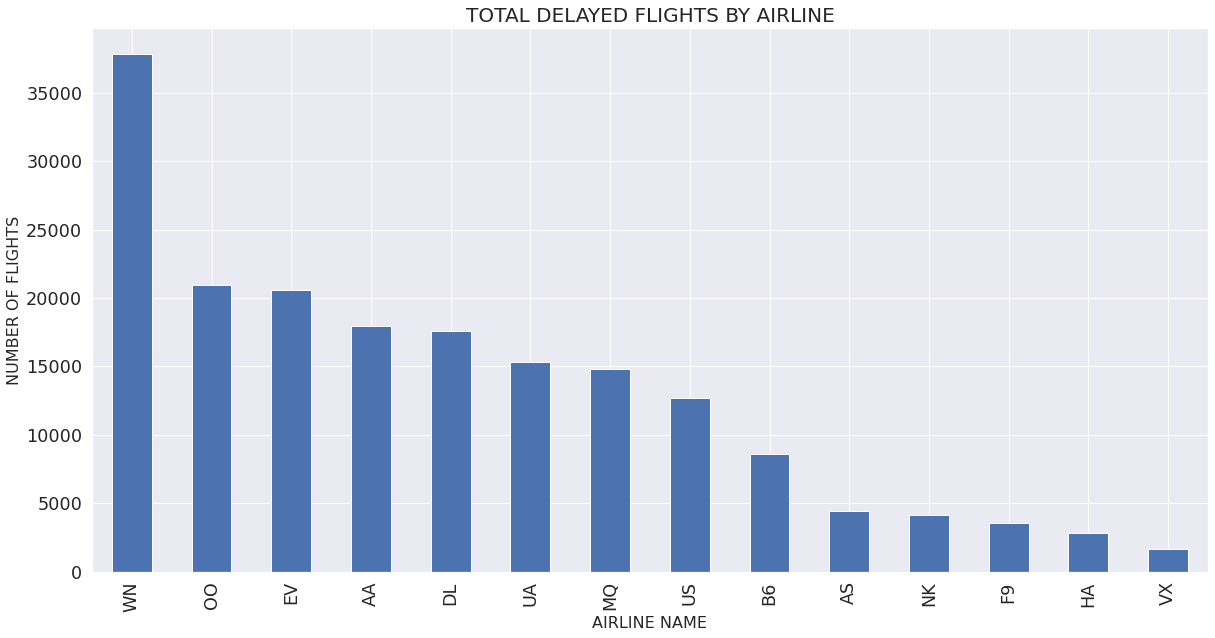

In [77]:
plt.figure(figsize=(20, 10))
df_flights.groupby('AIRLINE').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [78]:
df_flights.FLIGHT_STATUS.value_counts(normalize=True)

0    0.599333
1    0.400667
Name: FLIGHT_STATUS, dtype: float64

Lets first remember that the 0 represents flights that arrive on time, and the 1 the delayed flights, therefore, 40.06% of flights are delayed and that is a rather high percentage, meaning that around 1 out of every 3 flights is normally delayed.

In [79]:
# 1. Creating the new dataframe with the columns of my interest
df_PFD = df_flights[['AIRLINE', 'FLIGHT_STATUS']]
df_PFD.head()

,AIRLINE,FLIGHT_STATUS
0,AS,0
1,AA,0
2,US,1
3,AA,0
4,AS,0


In [80]:
df_PFD.shape

(457013, 2)

In [81]:
# 3. Non-normalize value_count()
df_PFD.FLIGHT_STATUS.value_counts()

0    273903
1    183110
Name: FLIGHT_STATUS, dtype: int64

In [82]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df_PFD.groupby(['AIRLINE']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df_flights.AIRLINE.value_counts().rename_axis('AIRLINE').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='AIRLINE')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,AIRLINE,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,AA,17957,43074,41.69
1,AS,4462,13151,33.93
2,B6,8643,20482,42.20
3,DL,17589,63676,27.62
4,EV,20612,48084,42.87
5,F9,3543,6735,52.61
6,HA,2831,6408,44.18
7,MQ,14823,27568,53.77
8,NK,4116,8632,47.68
9,OO,20980,46655,44.97


In [83]:
# 9. Double checking that that total delayed flights match from both sources
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 183110


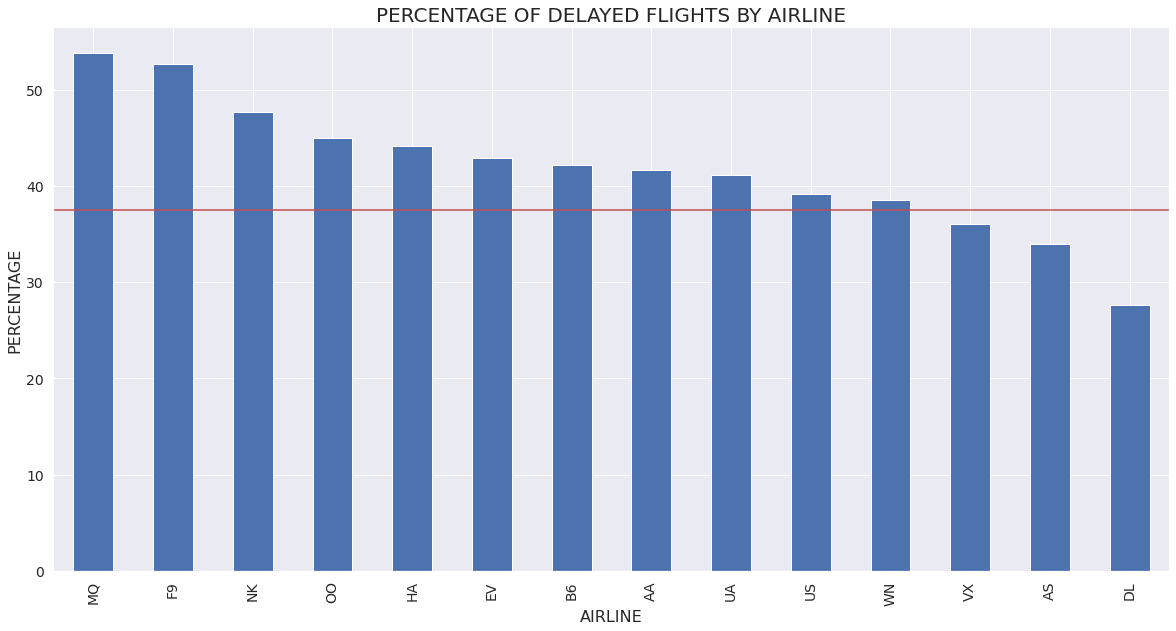

In [84]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('AIRLINE').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

Total Minutes Delayed by Airline
This next plot is quite interesting because it looks at the total number of minutes

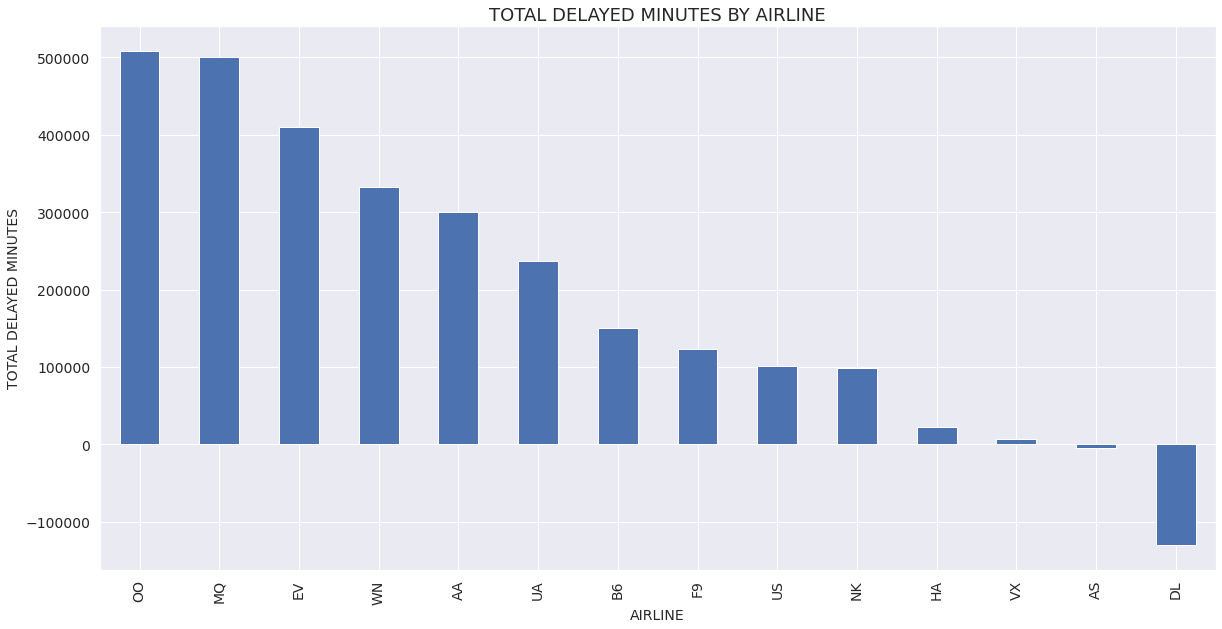

In [85]:
plt.figure(figsize=(20, 10))
df_flights.groupby('AIRLINE').ARRIVAL_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

Average Delay Time per Airline

In [86]:
df_flights.head(2)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE,FLIGHT_STATUS
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,0


In [87]:
test_3 = df_flights[['AIRLINE', 'ARRIVAL_DELAY']]
test_3 = test_3.groupby(['AIRLINE']).mean().reset_index()
test_3.rename({'ARRIVAL_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,AIRLINE,AVG_DELAY
0,DL,-2.043847
1,AS,-0.320888
2,VX,1.420702
3,US,3.107457
4,WN,3.389466
5,HA,3.512640
6,UA,6.352729
7,AA,6.955843
8,B6,7.347281
9,EV,8.537497


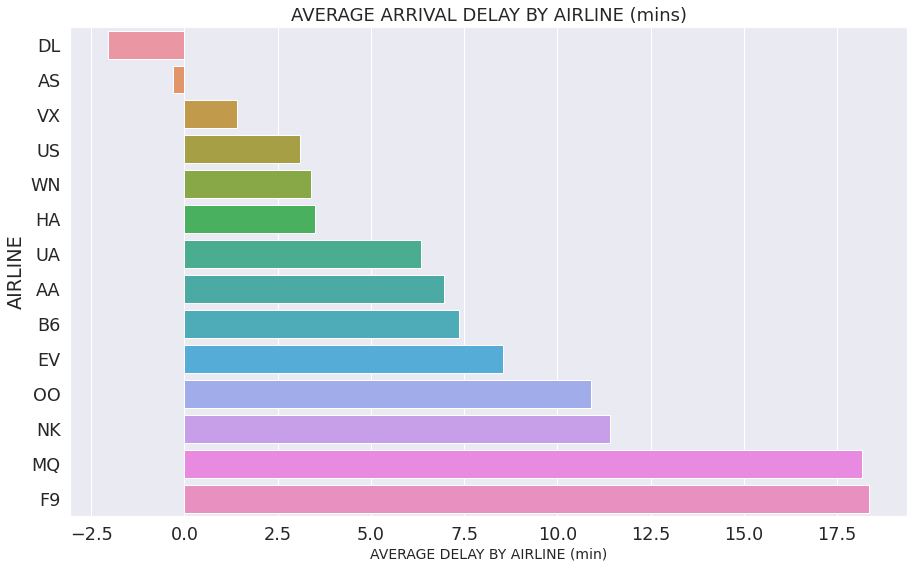

In [88]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='AIRLINE', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()


20 Most Common Destination (Cities)

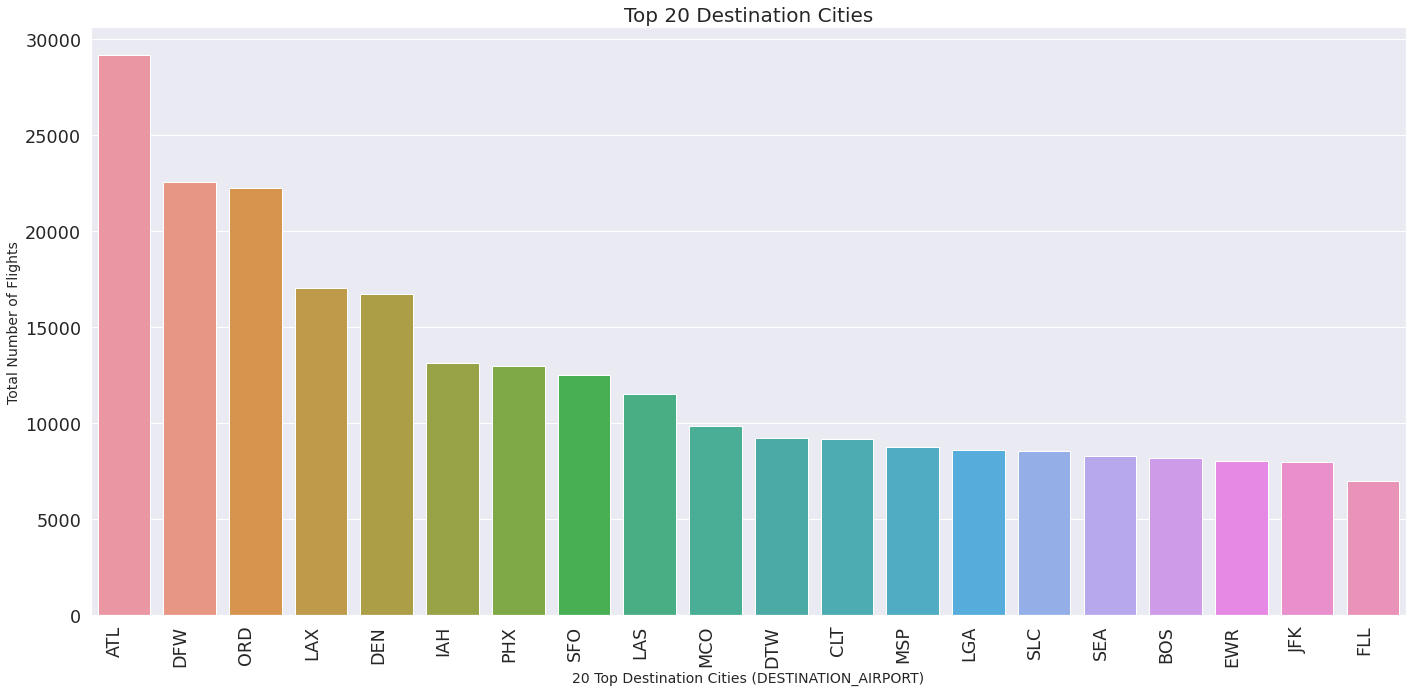

In [89]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df_flights['DESTINATION_AIRPORT'], data=df_flights, order=df_flights['DESTINATION_AIRPORT'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 20 Destination Cities', fontsize=20)
plt.xlabel('20 Top Destination Cities (DESTINATION_AIRPORT)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

Worse & Best months to travel based on flight delays

In [130]:
df_flights['DESTINATION_AIRPORT'].value_counts().iloc[0:20]

ATL    29172
DFW    22590
ORD    22277
LAX    17051
DEN    16733
IAH    13146
PHX    12989
SFO    12540
LAS    11509
MCO     9877
DTW     9252
CLT     9180
MSP     8783
LGA     8614
SLC     8545
SEA     8317
BOS     8173
EWR     8021
JFK     7982
FLL     7016
Name: DESTINATION_AIRPORT, dtype: int64

In [90]:
import calendar
df_flights['Month_ABBR'] = df_flights['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [91]:
df_flights.tail()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE,FLIGHT_STATUS,Month_ABBR
457008,457008,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,2359.0,18.0,17.0,221.0,1576,440,-21.0,2015-01-31,0,Jan
457009,457009,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,2359.0,16.0,15.0,252.0,1927,711,-13.0,2015-01-31,0,Jan
457010,457010,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,2.0,35.0,37.0,192.0,1506,511,23.0,2015-01-31,1,Jan
457011,457011,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,2359.0,40.0,39.0,162.0,1199,441,29.0,2015-01-31,1,Jan
457012,457012,2015,1,31,6,UA,1104,N73251,ANC,DEN,2359,2358.0,23.0,21.0,309.0,2405,708,2.0,2015-01-31,1,Jan


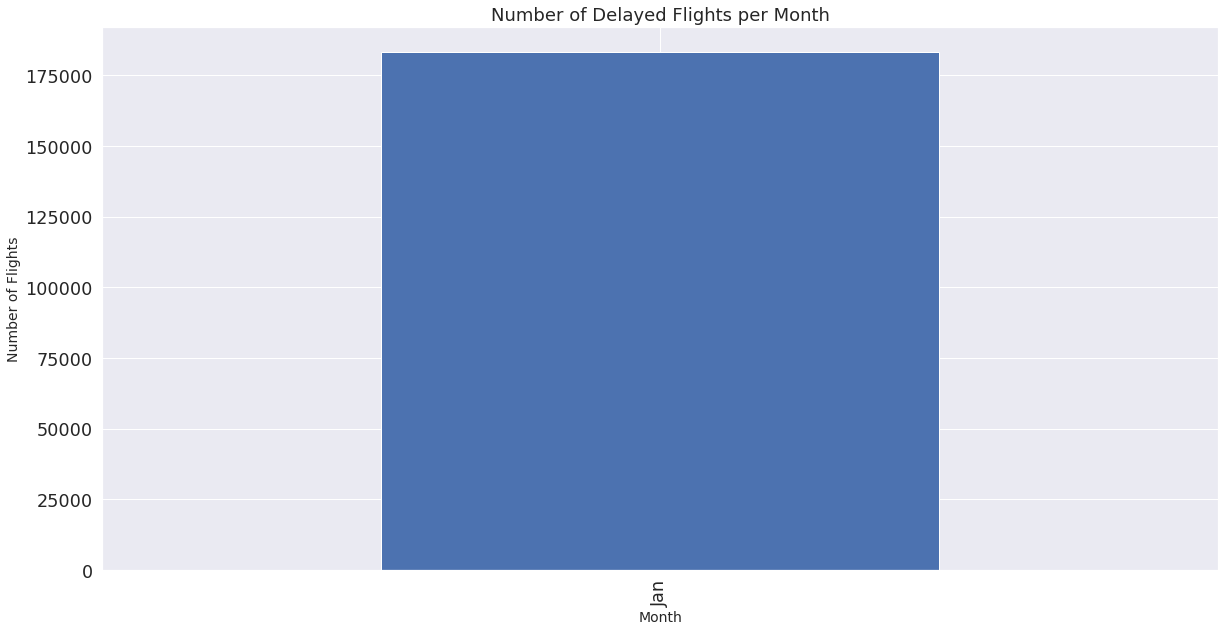

In [92]:
plt.figure(figsize=(20, 10))
df_flights.groupby('Month_ABBR').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

Is there a better day to travel?

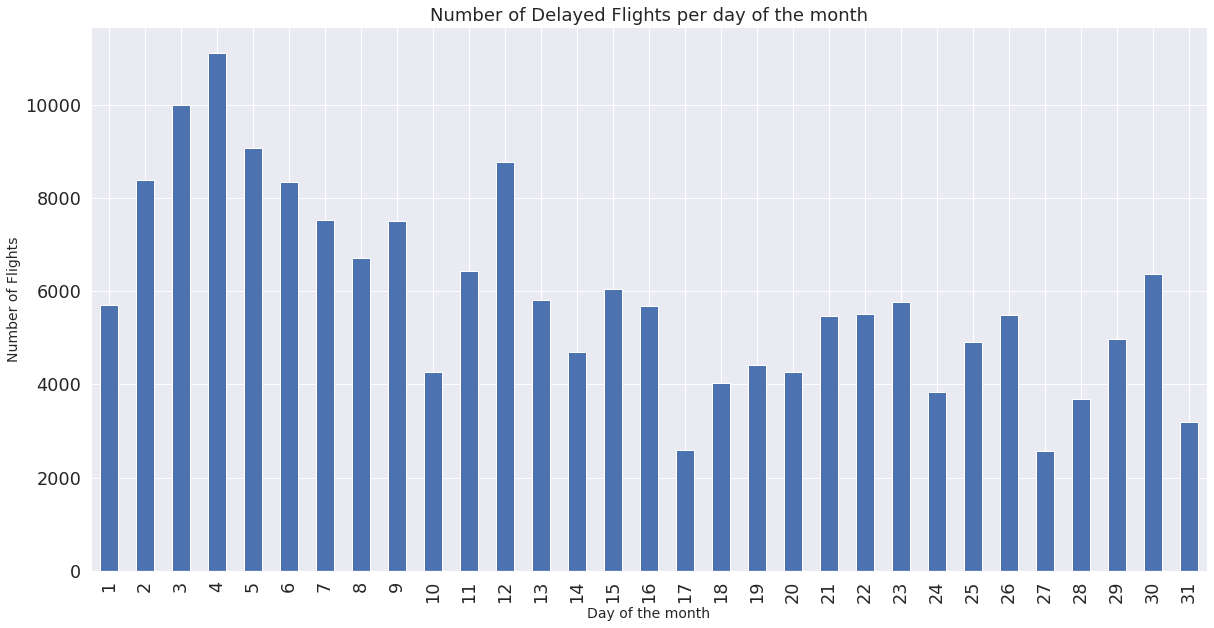

In [93]:
plt.figure(figsize=(20, 10))
df_flights.groupby('DAY').FLIGHT_STATUS.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

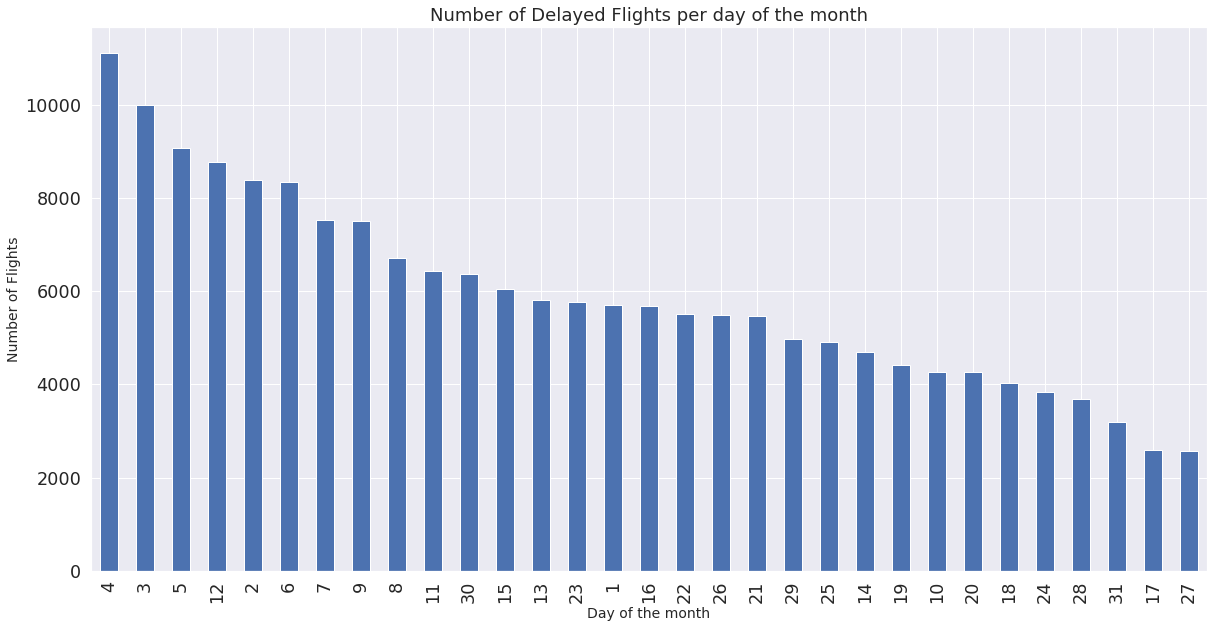

In [31]:
plt.figure(figsize=(20, 10))
barplot =df_flights.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

In [131]:
df_flights.groupby('AIRLINE').FLIGHT_STATUS.sum().sort_values(ascending=False)

AIRLINE
WN    37826
OO    20980
EV    20612
AA    17957
DL    17589
UA    15351
MQ    14823
US    12702
B6     8643
AS     4462
NK     4116
F9     3543
HA     2831
VX     1675
Name: FLIGHT_STATUS, dtype: int64

Impact of Delays (Departure vs. Arrival Delay)

In [94]:
# import matplotlib as mpl

# mpl.rcParams.update(mpl.rcParamsDefault)
# mpl.rcParams['hatch.linewidth'] = 1.8  

# fig = plt.figure(1, figsize=(15,9))
# ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df_flights, color="lightskyblue", ci=None)
# ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df_flights, color="r", hatch = '///', alpha = 0.0, ci=None)
# ax.yaxis.label.set_visible(False)
# plt.title('Departure vs Arrival Delay')
# plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

In [95]:
df_flights_LA = df_flights[(df_flights['ARRIVAL_DELAY'] >= 15)]

In [96]:
df_flights.shape

(457013, 21)

In [97]:
df_flights_LA.shape

(95951, 21)

In [98]:
# df_flights_LD = df_flights[(df_flights['DEPARTURE_DELAY'] > 15)]
# df_flights_LD.shape

In [99]:
# df_flights_LD.DEPARTURE_DELAY.describe()

Most Popular Destination with Average Arrival Delays

In [100]:
test_4 = df_flights[['DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]
test_4 = test_4.groupby(['DESTINATION_AIRPORT']).mean().reset_index()
test_4.head(10)

,DESTINATION_AIRPORT,ARRIVAL_DELAY
0,ABE,4.166667
1,ABI,12.361233
2,ABQ,5.538857
3,ABR,-3.716667
4,ABY,6.812500
5,ACT,14.197183
6,ACV,7.222222
7,ACY,8.677711
8,ADK,-24.555556
9,ADQ,0.931034


In [101]:
test_4.shape

(312, 2)

In [102]:
test_5 = df_flights.DESTINATION_AIRPORT.value_counts().rename_axis('DESTINATION_AIRPORT').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,DESTINATION_AIRPORT,FLIGHTS
0,ATL,29172
1,DFW,22590
2,ORD,22277
3,LAX,17051
4,DEN,16733
5,IAH,13146
6,PHX,12989
7,SFO,12540
8,LAS,11509
9,MCO,9877


In [103]:
test_4_5 = pd.merge(test_5, test_4, on='DESTINATION_AIRPORT')
test_4_5.head()

,DESTINATION_AIRPORT,FLIGHTS,ARRIVAL_DELAY
0,ATL,29172,0.579597
1,DFW,22590,9.108632
2,ORD,22277,14.672487
3,LAX,17051,1.739605
4,DEN,16733,7.548138


In [104]:
test_4_5.describe()

,FLIGHTS,ARRIVAL_DELAY
count,30.000000,30.000000
mean,10295.366667,4.808165
std,5925.738118,3.566579
min,4002.000000,0.164190
25%,6489.250000,2.044789
50%,8431.000000,3.758660
75%,12282.250000,6.768734
max,29172.000000,14.672487


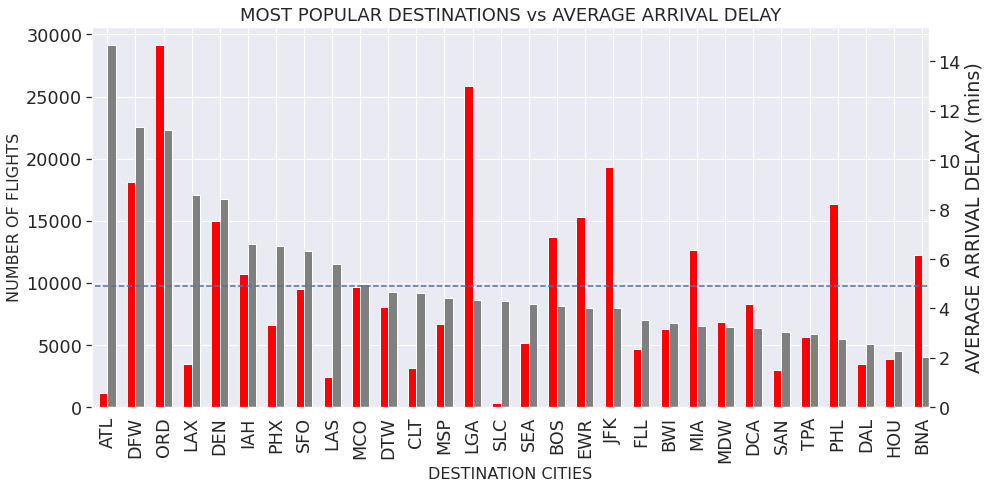

In [105]:
test_4_5 = test_4_5.set_index('DESTINATION_AIRPORT')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ARRIVAL_DELAY.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

The dashed line that you see on the plot corresponds to the average delay on arrival of the top 30 destinations. It is interesting to see how Atlanta, having such a high the number of landings, has a very low average delay with just less than 1 minutes, whereas LGA, a not so popular destination, has such a high minute average delay.

In [106]:
# test_6 = df_flights[['ORIGIN_AIRPORT', 'DEPARTURE_DELAY']]
# test_6 = test_6.groupby(['ORIGIN_AIRPORT']).mean().reset_index()
# test_6.head(10)

In [107]:
test_7 = df_flights.ORIGIN_AIRPORT.value_counts().rename_axis('ORIGIN_AIRPORT').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,ORIGIN_AIRPORT,FLIGHTS
0,ATL,29197
1,DFW,22571
2,ORD,22316
3,LAX,17048
4,DEN,16775
5,IAH,13191
6,PHX,13014
7,SFO,12570
8,LAS,11499
9,MCO,9867


In [108]:
# test_6_7 = pd.merge(test_7, test_6, on='ORIGIN_AIRPORT')
# test_6_7.head()

In [109]:
# test_6_7.describe()

In [110]:
# test_6_7 = test_6_7.set_index('ORIGIN_AIRPORT')

# fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis
# width = .3

# test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
# test_6_7.DEPARTURE_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

# plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

# #ax.grid(None, axis=1)
# ax2.grid(None)

# ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
# ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
# ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
# ax.set_xlabel('TOP 30 CITIES', fontsize=16)
# plt.show()

Number of Destinations by Airline

In [111]:
cities = df_flights[['AIRLINE', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]
cities = cities.groupby(['AIRLINE', 'DESTINATION_AIRPORT']).mean().reset_index()

In [112]:
cities.AIRLINE.value_counts()

OO    175
EV    166
DL    145
MQ    122
WN     86
AA     81
UA     77
US     74
F9     63
AS     59
B6     57
NK     33
VX     18
HA     17
Name: AIRLINE, dtype: int64

To see if this will work I will do a test to go around and get the number of cities that Delta Airlines travels to within thee US. I should bee getting a 145, and if this works then I'll continue with all the rest of the airlines

In [113]:
temp = cities[(cities['AIRLINE'] == "DL")]

In [114]:
temp.head()

,AIRLINE,DESTINATION_AIRPORT,ARRIVAL_DELAY
197,DL,ABE,1.478261
198,DL,ABQ,-5.606061
199,DL,AGS,1.538462
200,DL,ALB,5.508475
201,DL,ANC,4.035088


In [115]:
temp.DESTINATION_AIRPORT.nunique()

145

It seems to have worked, so I will convert the that same output into a dataframe

In [116]:
cities_airline = cities.AIRLINE.value_counts().rename_axis('AIRLINE').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,AIRLINE,NUMBER_CITIES
0,OO,175
1,EV,166
2,DL,145
3,MQ,122
4,WN,86
5,AA,81
6,UA,77
7,US,74
8,F9,63
9,AS,59


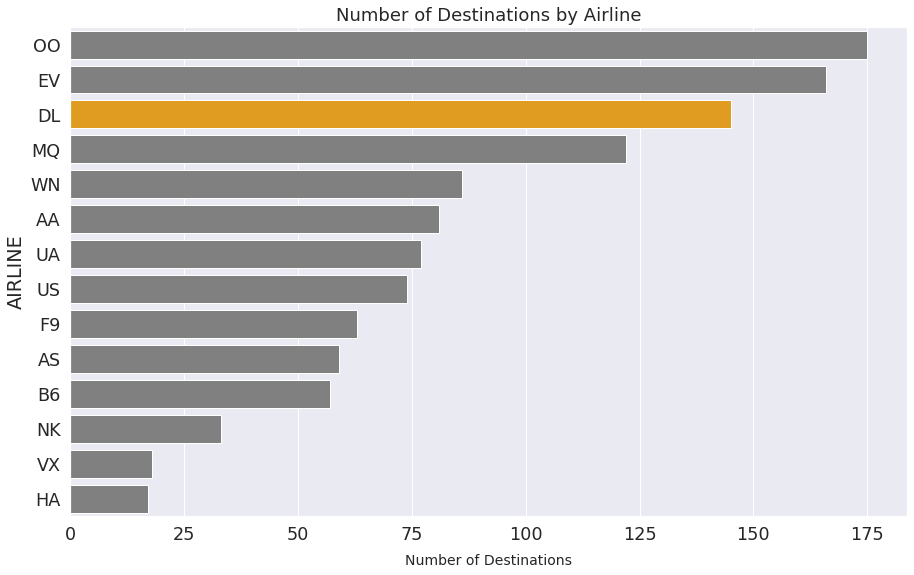

In [117]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="AIRLINE", data=cities_airline, palette=["grey" if y!='DL' else "orange" for y in cities_airline.AIRLINE])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [118]:
# df_flights['ARR-DEP_DELAY'] = df_flights['ARRIVAL_DELAY'] - df_flights['DEPARTURE_DELAY']
# df_flights.head(3).append(df_flights.tail(3))

In [119]:
# sns.set_style('darkgrid')

# fig = plt.figure(1, figsize=(15,9))
# ax = sns.barplot(x="ARR-DEP_DELAY", y="AIRLINE", data=df_flights, palette=["grey" if y!='DL' else "orange" for y in cities_airline.AIRLINE])
# plt.title('Difference between Arrival and Departure Delay', fontsize=18)
# plt.xlabel('Delay in min', fontsize=14, labelpad=10);
# plt.show()

In [120]:
df2 = pd.merge(df_fp, test_3, on='AIRLINE')
df2 = pd.merge(df2, cities_airline, on='AIRLINE')
df2.head(3)

,AIRLINE,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES
0,AA,17957,43074,41.69,6.955843,81
1,AS,4462,13151,33.93,-0.320888,59
2,B6,8643,20482,42.20,7.347281,57


In [121]:
test_8 = df_flights[['AIRLINE', 'ARRIVAL_DELAY']]
test_8.head(2)

,AIRLINE,ARRIVAL_DELAY
0,AS,-22.0
1,AA,-9.0


In [122]:
test_8 = test_8.groupby('AIRLINE').sum().sort_values(by=['ARRIVAL_DELAY']).reset_index()
test_8.rename({'ARRIVAL_DELAY': 'TOTAL_DELAY_MIN'}, axis=1, inplace=True)


In [123]:
df2 = pd.merge(df2, test_8, on='AIRLINE')
df2 = df2.sort_values(by=['TOTAL_FLIGHTS'], ascending=False)
df2.head(18)

,AIRLINE,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES,TOTAL_DELAY_MIN
13,WN,37826,98060,38.57,3.389466,86,332371.0
3,DL,17589,63676,27.62,-2.043847,145,-130144.0
4,EV,20612,48084,42.87,8.537497,166,410517.0
9,OO,20980,46655,44.97,10.889894,175,508068.0
0,AA,17957,43074,41.69,6.955843,81,299616.0
10,UA,15351,37363,41.09,6.352729,77,237357.0
11,US,12702,32478,39.11,3.107457,74,100924.0
7,MQ,14823,27568,53.77,18.164974,122,500772.0
2,B6,8643,20482,42.20,7.347281,57,150487.0
1,AS,4462,13151,33.93,-0.320888,59,-4220.0


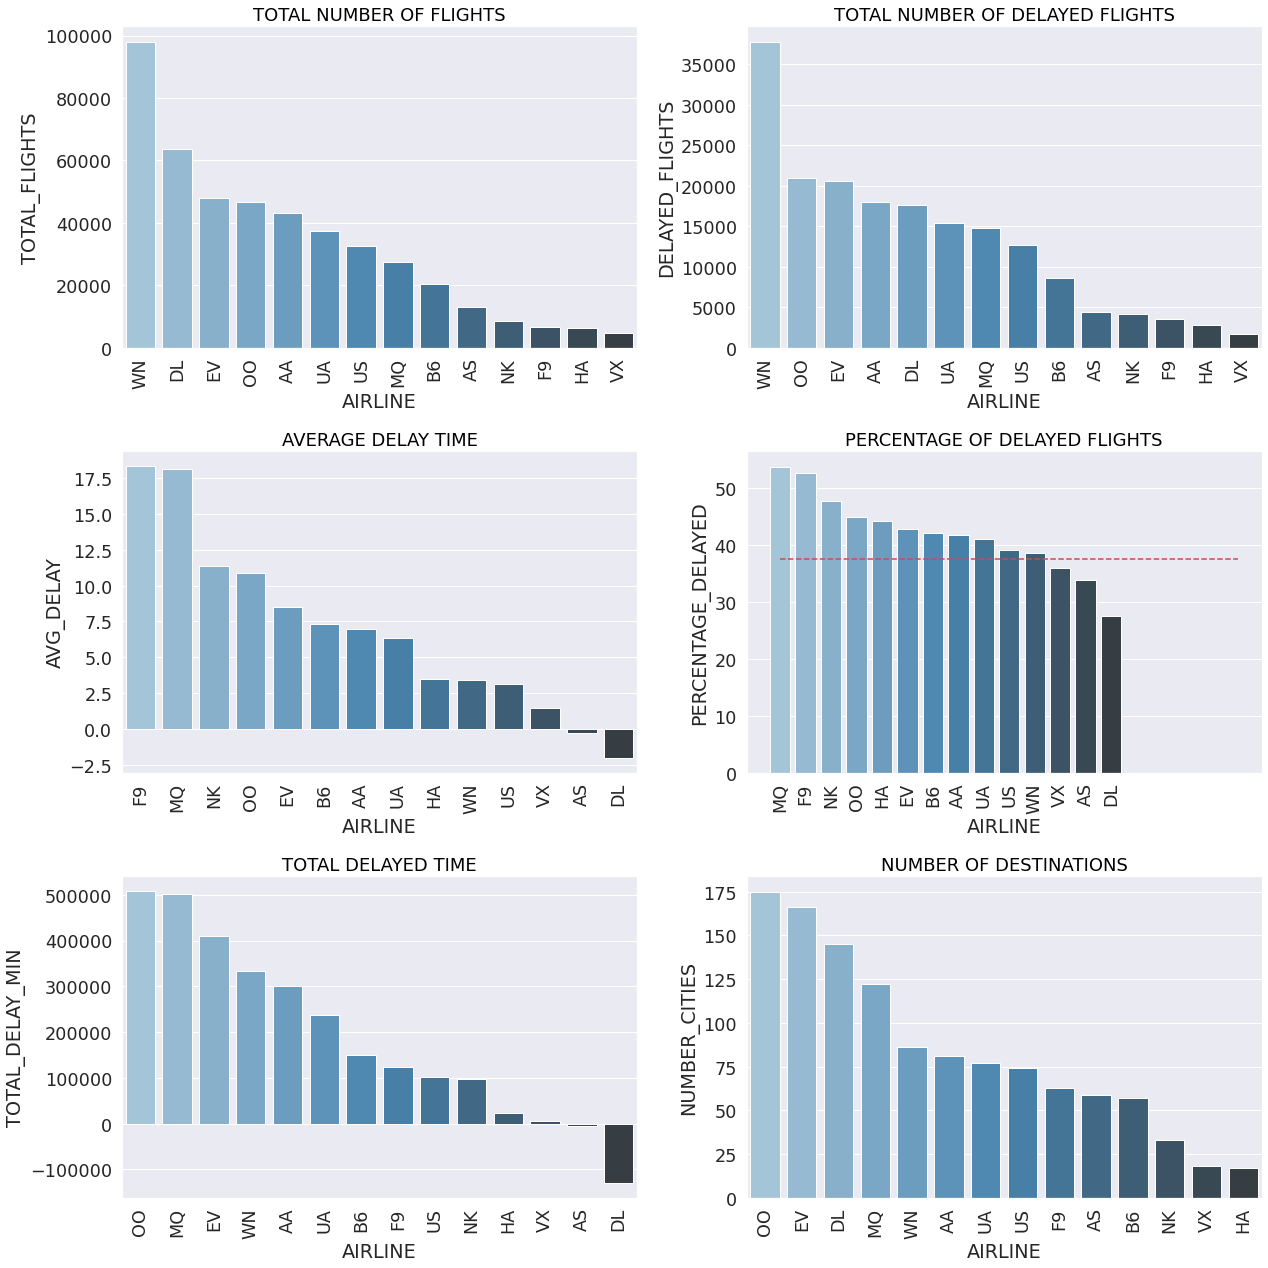

In [124]:
fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('TOTAL NUMBER OF FLIGHTS', fontsize=18, color="black")
sub1 = sns.barplot(x="AIRLINE", y="TOTAL_FLIGHTS", data=df2, palette="Blues_d", ax=sub1)
#sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('TOTAL NUMBER OF DELAYED FLIGHTS', fontsize=18, color="black")
sub2 = sns.barplot(x="AIRLINE", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).AIRLINE, palette="Blues_d", ax=sub2)
#sub2 = sns.barplot(x="OP_CARRIER", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('AVERAGE DELAY TIME', fontsize=18, color="black")
sub3 = sns.barplot(x="AIRLINE", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).AIRLINE, palette="Blues_d", ax=sub3)
#sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('PERCENTAGE OF DELAYED FLIGHTS', fontsize=18, color="black")
sub4 = sns.barplot(x="AIRLINE", y="PERCENTAGE_DELAYED", data=df2, order=df2.sort_values('PERCENTAGE_DELAYED', ascending=False).AIRLINE, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=37.52, xmin=0, xmax=18, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('TOTAL DELAYED TIME', fontsize=18, color="black")
sub5 = sns.barplot(x="AIRLINE", y="TOTAL_DELAY_MIN", data=df2, order=df2.sort_values('TOTAL_DELAY_MIN', ascending=False).AIRLINE, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)

sub6 = fig.add_subplot(326)
sub6.set_title('NUMBER OF DESTINATIONS', fontsize=18, color="black")
sub6 = sns.barplot(x="AIRLINE", y="NUMBER_CITIES", data=df2, order=df2.sort_values('NUMBER_CITIES', ascending=False).AIRLINE, palette="Blues_d", ax=sub6)
sub6.set_xticklabels(sub6.get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()

In [125]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [126]:
df_flights.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DATE,FLIGHT_STATUS,Month_ABBR
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01,0,Jan
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01,0,Jan
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01,1,Jan
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01,0,Jan
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01,0,Jan


In [127]:
df_flights['WEEKDAY'] = df_flights['DATE'].dt.dayofweek

In [128]:
df_flights.WEEKDAY.value_counts()

4    79814
3    76284
5    63138
0    61472
2    60697
6    58470
1    57138
Name: WEEKDAY, dtype: int64

In [132]:
# variables_to_remove = ['DATE','TAXI_OUT','WHEELS_OFF','YEAR','DAY_OF_WEEK',
#                        'FLIGHT_NUMBER', 'TAIL_NUMBER','Month_ABBR']
# df_flights.drop(variables_to_remove, axis = 1, inplace = True)

In [133]:
df_flights = df_flights[['DAY','MONTH','AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_TIME',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY','DISTANCE','FLIGHT_STATUS']]
df_flights[:5]

,DAY,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DISTANCE,FLIGHT_STATUS
0,1,1,AS,ANC,SEA,5,2354.0,205.0,430,-22.0,1448,0
1,1,1,AA,LAX,PBI,10,2.0,280.0,750,-9.0,2330,0
2,1,1,US,SFO,CLT,20,18.0,286.0,806,5.0,2296,1
3,1,1,AA,LAX,MIA,20,15.0,285.0,805,-9.0,2342,0
4,1,1,AS,SEA,ANC,25,24.0,235.0,320,-21.0,1448,0


In [134]:
df_flights.DESTINATION_AIRPORT.value_counts().iloc[:20]

ATL    29172
DFW    22590
ORD    22277
LAX    17051
DEN    16733
IAH    13146
PHX    12989
SFO    12540
LAS    11509
MCO     9877
DTW     9252
CLT     9180
MSP     8783
LGA     8614
SLC     8545
SEA     8317
BOS     8173
EWR     8021
JFK     7982
FLL     7016
Name: DESTINATION_AIRPORT, dtype: int64

In [135]:
top_cities = df_flights.DESTINATION_AIRPORT.value_counts().iloc[0:20].rename_axis('DESTINATION_AIRPORT').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DESTINATION_AIRPORT,TOTAL_FLIGHTS
0,ATL,29172
1,DFW,22590
2,ORD,22277
3,LAX,17051
4,DEN,16733


In [136]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DESTINATION_AIRPORT.unique()

array(['ATL', 'DFW', 'ORD', 'LAX', 'DEN', 'IAH', 'PHX', 'SFO', 'LAS',
       'MCO', 'DTW', 'CLT', 'MSP', 'LGA', 'SLC', 'SEA', 'BOS', 'EWR',
       'JFK', 'FLL'], dtype=object)

In [137]:
# Creating a list with top 20 cities only:
city_list = top_cities['DESTINATION_AIRPORT'].tolist()

In [138]:
city_list

['ATL',
 'DFW',
 'ORD',
 'LAX',
 'DEN',
 'IAH',
 'PHX',
 'SFO',
 'LAS',
 'MCO',
 'DTW',
 'CLT',
 'MSP',
 'LGA',
 'SLC',
 'SEA',
 'BOS',
 'EWR',
 'JFK',
 'FLL']

In [139]:
boolean_series = df_flights.DESTINATION_AIRPORT.isin(city_list)
dfm = df_flights[boolean_series]
dfm.head()

,DAY,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DISTANCE,FLIGHT_STATUS
0,1,1,AS,ANC,SEA,5,2354.0,205.0,430,-22.0,1448,0
2,1,1,US,SFO,CLT,20,18.0,286.0,806,5.0,2296,1
5,1,1,DL,SFO,MSP,25,20.0,217.0,602,8.0,1589,1
6,1,1,NK,LAS,MSP,25,19.0,181.0,526,-17.0,1299,0
7,1,1,US,LAX,CLT,30,44.0,273.0,803,-10.0,2125,0


In [140]:
dfm.DESTINATION_AIRPORT.unique()

array(['SEA', 'CLT', 'MSP', 'DFW', 'ATL', 'IAH', 'FLL', 'ORD', 'PHX',
       'EWR', 'JFK', 'MCO', 'BOS', 'SFO', 'DTW', 'DEN', 'LAX', 'LGA',
       'SLC', 'LAS'], dtype=object)

In [141]:
dfm.DESTINATION_AIRPORT.value_counts()

ATL    29172
DFW    22590
ORD    22277
LAX    17051
DEN    16733
IAH    13146
PHX    12989
SFO    12540
LAS    11509
MCO     9877
DTW     9252
CLT     9180
MSP     8783
LGA     8614
SLC     8545
SEA     8317
BOS     8173
EWR     8021
JFK     7982
FLL     7016
Name: DESTINATION_AIRPORT, dtype: int64

In [142]:
dfm.shape

(251767, 12)

In [143]:
df_flights.shape

(457013, 12)

In [144]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251767 entries, 0 to 457012
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY                  251767 non-null  int64  
 1   MONTH                251767 non-null  int64  
 2   AIRLINE              251767 non-null  object 
 3   ORIGIN_AIRPORT       251767 non-null  object 
 4   DESTINATION_AIRPORT  251767 non-null  object 
 5   SCHEDULED_DEPARTURE  251767 non-null  int64  
 6   DEPARTURE_TIME       251767 non-null  float64
 7   SCHEDULED_TIME       251767 non-null  float64
 8   SCHEDULED_ARRIVAL    251767 non-null  int64  
 9   ARRIVAL_DELAY        251767 non-null  float64
 10  DISTANCE             251767 non-null  int64  
 11  FLIGHT_STATUS        251767 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 25.0+ MB


In [145]:
dfm.shape

(251767, 12)

In [146]:
dfm.to_csv('model_data.csv')

In [147]:
dfm.corr()

,DAY,MONTH,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DISTANCE,FLIGHT_STATUS
DAY,1.000000,NaN,-0.015723,-0.028403,-0.024859,-0.006093,-0.163781,-0.028418,-0.179978
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCHEDULED_DEPARTURE,-0.015723,NaN,1.000000,0.971542,0.056081,0.738982,0.074919,0.073755,0.092549
DEPARTURE_TIME,-0.028403,NaN,0.971542,1.000000,0.048039,0.743124,0.160861,0.062549,0.136726
SCHEDULED_TIME,-0.024859,NaN,0.056081,0.048039,1.000000,0.090267,-0.053457,0.977477,-0.025228
SCHEDULED_ARRIVAL,-0.006093,NaN,0.738982,0.743124,0.090267,1.000000,0.069246,0.093997,0.090345
ARRIVAL_DELAY,-0.163781,NaN,0.074919,0.160861,-0.053457,0.069246,1.000000,-0.044966,0.547965
DISTANCE,-0.028418,NaN,0.073755,0.062549,0.977477,0.093997,-0.044966,1.000000,-0.012887
FLIGHT_STATUS,-0.179978,NaN,0.092549,0.136726,-0.025228,0.090345,0.547965,-0.012887,1.000000


In [148]:
abs(dfm.corr())>.75

,DAY,MONTH,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DISTANCE,FLIGHT_STATUS
DAY,True,False,False,False,False,False,False,False,False
MONTH,False,False,False,False,False,False,False,False,False
SCHEDULED_DEPARTURE,False,False,True,True,False,False,False,False,False
DEPARTURE_TIME,False,False,True,True,False,False,False,False,False
SCHEDULED_TIME,False,False,False,False,True,False,False,True,False
SCHEDULED_ARRIVAL,False,False,False,False,False,True,False,False,False
ARRIVAL_DELAY,False,False,False,False,False,False,True,False,False
DISTANCE,False,False,False,False,True,False,False,True,False
FLIGHT_STATUS,False,False,False,False,False,False,False,False,True


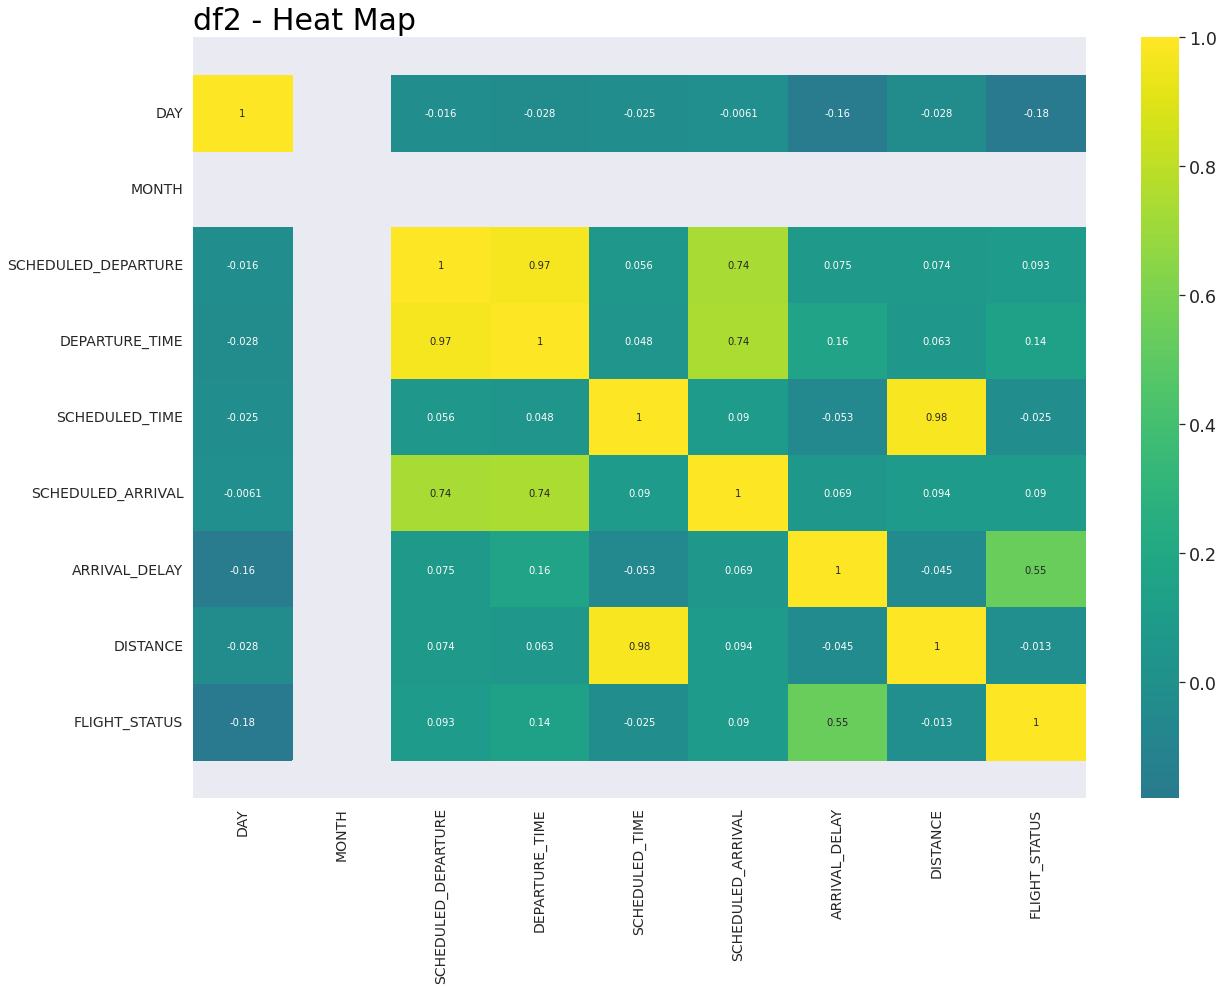

In [149]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

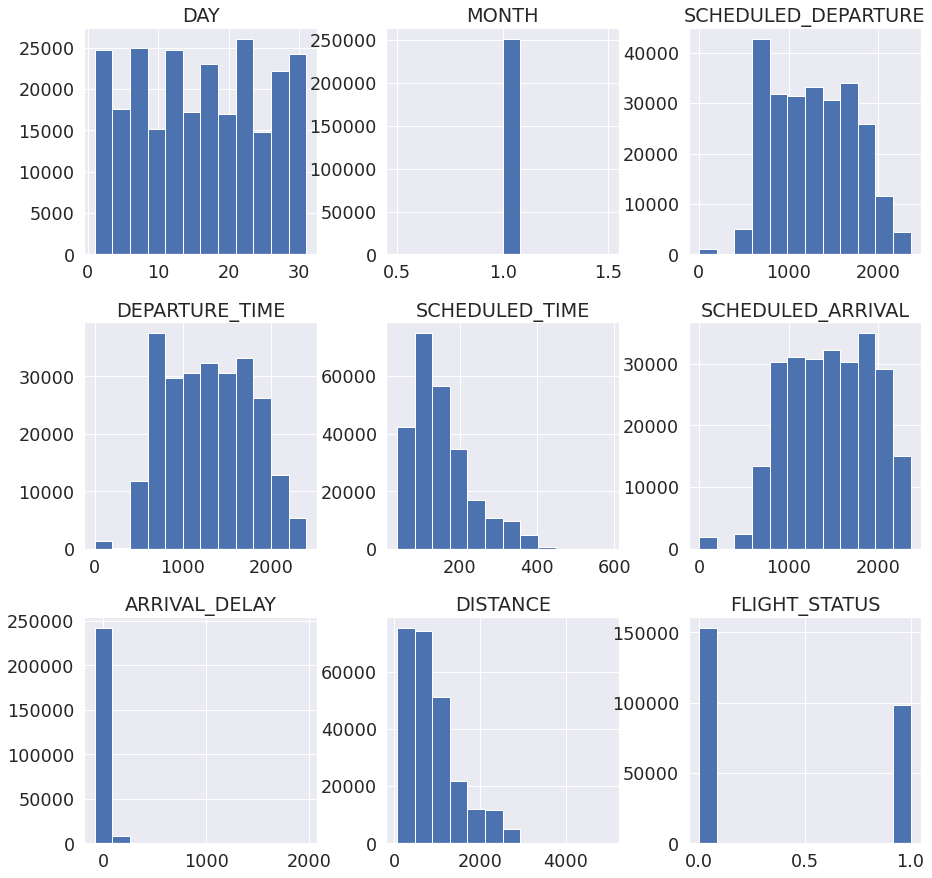

In [150]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [151]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,DAY,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DISTANCE,FLIGHT_STATUS
0,1,1,AS,ANC,SEA,5,2354.0,205.0,430,-22.0,1448,0
2,1,1,US,SFO,CLT,20,18.0,286.0,806,5.0,2296,1
5,1,1,DL,SFO,MSP,25,20.0,217.0,602,8.0,1589,1
6,1,1,NK,LAS,MSP,25,19.0,181.0,526,-17.0,1299,0
7,1,1,US,LAX,CLT,30,44.0,273.0,803,-10.0,2125,0


In [152]:
dfm_jan.MONTH.value_counts()

1    251767
Name: MONTH, dtype: int64